
Autorzy:
*   Igor Szumny
*   Franciszek Stolarczyk



#Opis projektu#

##Cel##

Projekt ma na celu sprawdzenie zależności między odległością od rowu oceanicznego w strefie subdukcji, a głębokością trzęsienia ziemi.

##Założenia projektu##

Projekt został zrealizowany poprzez dane ze strony "The U.S. Geological Survey". Dane zostały zebrane poprzez zawężenie zakresu do danych o magnitudzie powyżej 2,5 z okresu od 08.02.1900 do 15.02.2023. Obszar został dobrany tak, aby odległość od rowu oceanicznego była zgodna z długością geograficzną w celu łatwiejszego przeliczania. W tym celu został wybrany poniższy obszar:

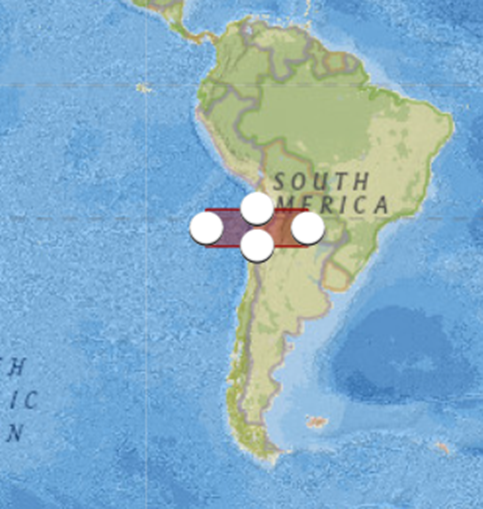

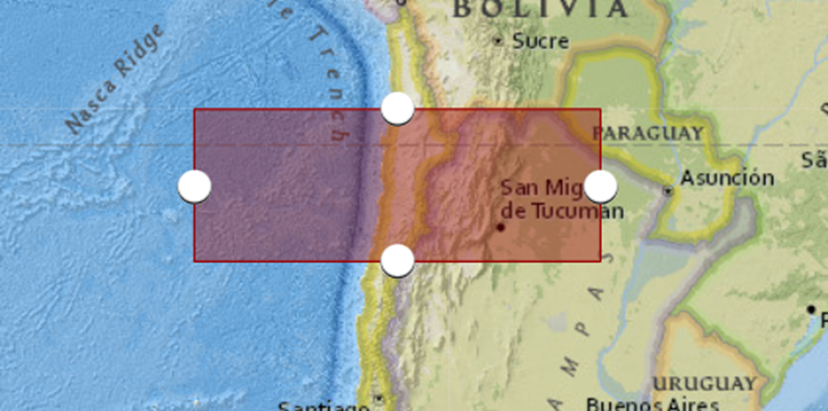

Są to dane zawierające się pomiędzy szerokościami geograficznymi: -21,910 a -28,119 i pomiędzy długościami geograficznymi: -78,926, a -60,645. Zakres ten został dobrany tak, aby rów oceaniczny był na lini północ-południe, co daje możliwość bezpośredniego odniesienia długości geograficznej do odległości od początku strefy subdukcji. Przewagą tej strefy względem pozostałych tak samo ukierunkowanych stref była również odległość od innych linii zderzeń płyt tektonicznych, które mogłyby zakłócać dane.

W strefie subdukcji płyta oceaniczna wsuwa się pod płytę kontynentalną co powinno się wiązać z korelacją pomiędzy głębokością trzęsienia ziemi, a odległością od rowu oceanicznego.

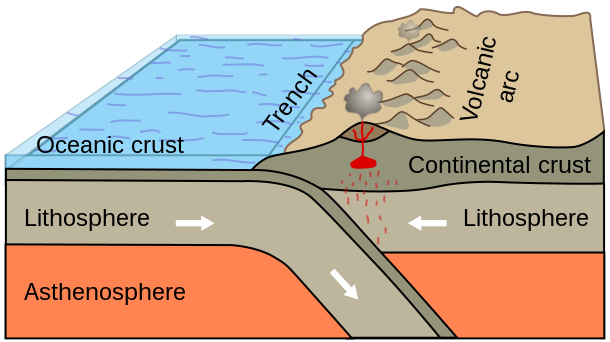

##Opis danych##

Zmienne jakościowe:


*   **mag** - magnituda zdarzenia, zmienna jakościowa ze względu na sposób obliczania (magnituda jest funkcją logarytmiczną). Zmienna mag została przeliczona na zmienną ilościową "energia".
*   **magType** - metoda obliczania magnitudy
*   place - miejsce epicentrum
*   type - typ zdarzenia (wszystkie == "earthquake")
*   status - wskazuje czy zdarzenie zostało wprowadzone przez człowieka
*   **locationSource** - sieć, która była pierwotnie autorem zgłoszenia lokalizacji
*   magSource - sieć, która była pierwotnie autorem zgłoszenia magnitudy
*   time - data i czas zdarzenia
*   updated - data i czas ostatniej aktualizacji

Zmienne ilościowe:


*   **energia** - energia trzęsienia ziemi przeliczona z magnitudy za pomocą wzoru 1 ( w joulach)
*   **latitude** - szerokość geograficzna ( w stopniach)
*   **longitude** - długość geograficzna (w stopniach)
*   **depth** - głębokość hipocentrum zdarzenia (w km)
*   nst - ilość stacji użyta do określania lokalizacji trzęsienia ziemi
*   gap - przerwa azymutalna pomiędzy stacjami określającymi lokalizację trzęsienia ziemi
*   dmin - horyzontalna odległość pomiędzy najbliższą stacją badawczą a epicentrum (w stopniach)
*   rms - odzwierciedla dokładność modelu prędkości rozchodzenia się fal w stosunku do rzeczywistego czasu
*   horizontalError - niepewność zgłoszonej lokalizacji (w km)
*   **depthError** - niepewność zgłoszonej głębokości (w km)
*   magError - niepewność zgłoszonej magnitudy
*   magNst - całkowita liczba stacji użytych do określenia magnitudy zdarzenia

wzrór 1:

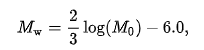

Dokumentacja pliku CSV: https://earthquake.usgs.gov/data/comcat/index.php#magSource

Źródło danych: https://earthquake.usgs.gov/earthquakes/map/?extent=-33.43144,-150.99609&extent=75.62863,-38.84766

Ilość obserwacji: 8703

Przygotowanie zbioru miało miejsce na poziomie wyszukiwania danych, wszystkie poniższe dane są brane pod uwagę, a ewentualne braki występują tylko w kolumnach, które nie będą badane i wynikają one z braku informacji w bazie.

#Wstępna analiza#

##Biblioteki i podłączanie dysku##

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Pobieranie danych##

In [ ]:
earthquake = pd.read_excel('/content/drive/MyDrive/earthquake_final.xlsx')

In [ ]:
earthquake

,time,latitude,longitude,depth,mag,energia,magType,nst,gap,dmin,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-02-15 21:16:43.806,-22.2944,-68.6043,124.999,4.60,7.943282e+15,mb,40.0,37.0,0.763,...,2023-04-22 23:33:11.040,"Antofagasta, Chile",earthquake,4.55,4.105,0.152,13.0,reviewed,us,us
1,2023-02-14 20:46:42.003,-23.0950,-66.5365,207.585,4.40,3.981072e+15,mb,21.0,75.0,1.520,...,2023-04-22 23:33:08.040,"88 km W of El Aguilar, Argentina",earthquake,8.93,11.668,0.203,7.0,reviewed,us,us
2,2023-02-13 23:55:04.090,-24.7955,-69.6393,86.293,4.20,1.995262e+15,mb,28.0,77.0,0.368,...,2023-04-22 23:33:06.040,"Antofagasta, Chile",earthquake,3.29,6.217,0.175,9.0,reviewed,us,us
3,2023-02-13 08:26:33.014,-26.5677,-71.3857,10.000,4.20,1.995262e+15,mb,17.0,156.0,0.821,...,2023-04-22 23:33:04.040,"135 km W of Diego de Almagro, Chile",earthquake,5.45,2.000,0.263,4.0,reviewed,us,us
4,2023-02-12 20:44:14.590,-22.1870,-63.6938,529.706,4.50,5.623413e+15,mb,82.0,24.0,3.613,...,2023-04-22 23:33:03.040,"18 km S of Yacuiba, Bolivia",earthquake,10.85,7.212,0.051,111.0,reviewed,us,us
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8698,1916-06-21 23:32:42.110,-27.5090,-63.5410,600.000,7.08,4.168694e+19,mw,NaN,NaN,NaN,...,2022-04-26 02:02:35.171,"48 km NNW of Suncho Corral, Argentina",earthquake,NaN,16.500,0.300,NaN,reviewed,iscgem,iscgem
8699,1913-05-25 01:24:54.790,-25.6190,-72.2450,15.000,6.89,2.162719e+19,mw,NaN,NaN,NaN,...,2022-04-26 02:09:01.441,"178 km W of Taltal, Chile",earthquake,NaN,25.000,0.230,NaN,reviewed,iscgem,iscgem
8700,1910-09-06 22:03:01.840,-27.4210,-70.6990,35.000,6.88,2.089296e+19,mw,NaN,NaN,NaN,...,2022-04-25 22:31:45.645,"36 km W of Copiapó, Chile",earthquake,NaN,6.500,0.200,NaN,reviewed,iscgem,iscgem
8701,1909-06-08 07:46:37.330,-26.1540,-70.5020,35.000,7.48,1.659587e+20,mw,NaN,NaN,NaN,...,2022-04-25 22:25:07.690,"50 km WNW of Diego de Almagro, Chile",earthquake,NaN,20.100,0.580,NaN,reviewed,iscgem,iscgem


##Statystyki opisowe##

In [ ]:
earthquake[['latitude','longitude', 'depth', 'energia', 'depthError']].describe()

,latitude,longitude,depth,energia,depthError
count,8703.000000,8703.000000,8703.000000,8.703000e+03,5650.000000
mean,-24.402569,-68.209018,138.774421,8.473292e+17,8.780764
std,1.789488,1.927853,101.441068,2.730730e+19,5.310097
min,-28.119000,-77.168000,0.000000,5.623413e+12,0.000000
25%,-25.348000,-70.013900,51.150000,1.412538e+15,5.600000
50%,-24.047000,-67.732000,128.800000,3.981072e+15,7.600000
75%,-23.040150,-66.824000,195.800000,1.122018e+16,10.600000
max,-21.910100,-61.465000,626.010000,1.995262e+21,72.200000


Dla zmiennych longitude i latitude można zaobserwować że w przypadku szerokości geograficznej dane są równo rozproszone, a w przypadku długości geograficznej dane są bardziej skoncentrowane w okolicach średniej. Na podstawie wartości dla 25%, 75%, max i min można stwierdzić, że dane zostały prawidłowo dobrane dla szerokości geograficznej i długości, gdyż ich znaczna większość występuje w części na wschód od rowu oceanicznego (ok. 72 stopień) i są one równo rozproszone względem szerokości geograficznej. Dane na zachód od tej wartoći mogą wystąpić jako pojedyncze przypadki w sytuacjach pęknięć bądź napięć skorupy, więc nie będą one usuwane do analizy. Maksymalna głębokość to 626 km, co pewnie jest związane z dokładnością urządzeń pomiarowych, minimalna 0 km co w teorii jest możliwe i nie ma podstaw do wykluczenia. Pozostałe dane to głównie dane określające dokładność pomiarów - biorąc pod uwagę ich parametry (zwłaszcza średnią) można potwierdzić dokładność zebranych danych. Brak danych w kolumnie depthError wynika zazwyczaj z braku nowoczesnych pomiarów, a duży błąd w przypadku tej zmiennej występuje dość rzadko. Podjęliśmy decyzję o nieusuwaniu tych zmiennych, ponieważ ilość pustych pozycji jest bliska połowie danych.

##Wstępna analiza##

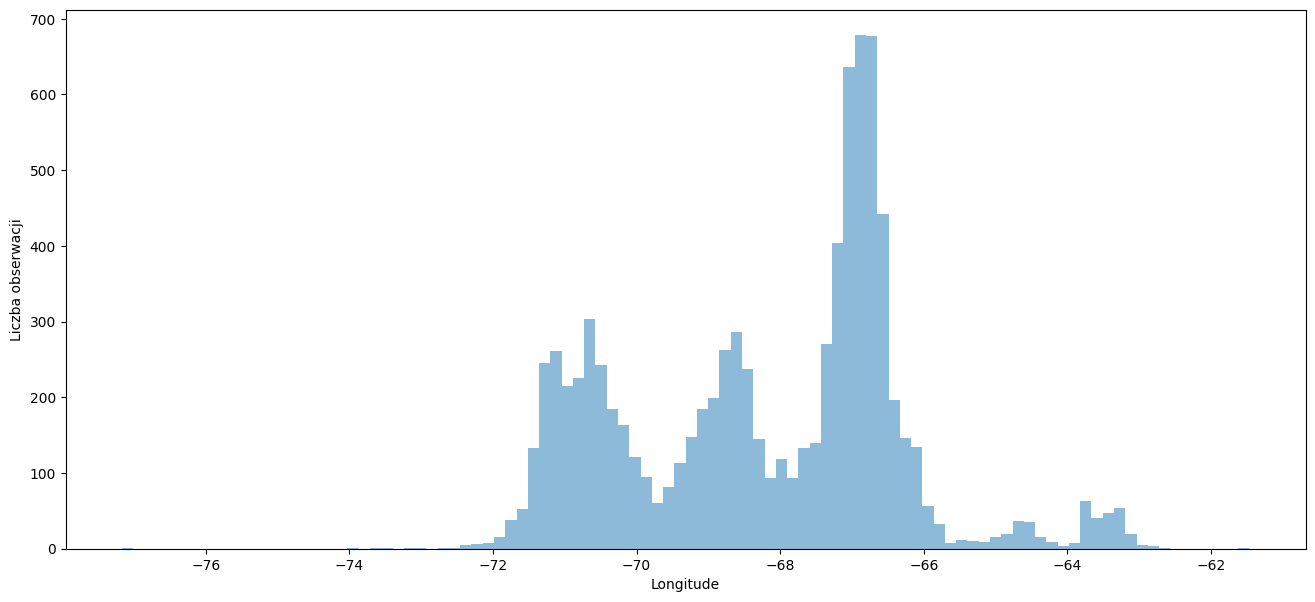

In [ ]:
fig, ax = plt.subplots(figsize=(16,7))
ax.hist(earthquake['longitude'], bins=100, alpha=0.5)
ax.set_xlabel('Longitude')
ax.set_ylabel('Liczba obserwacji')
plt.show()

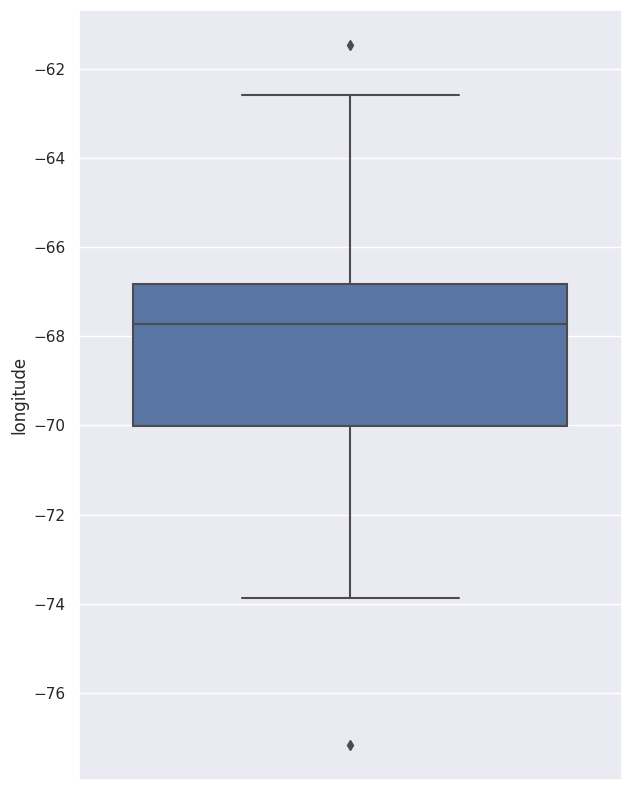

In [ ]:
sns.set(rc={'figure.figsize':(7,10)})
sns.boxplot(y = 'longitude',
            data = earthquake)

plt.show()

Na histogramie widoczny jest rokład danych od 72 południka i wstępnie widać potrójny rozkład normalny, który sprawdzimy w dalszej części. Wykres ramka-wąsy pokazuje równy rozkład danych, choć widoczne jest odchylenie mediany.

##Analiza skategoryzowana##

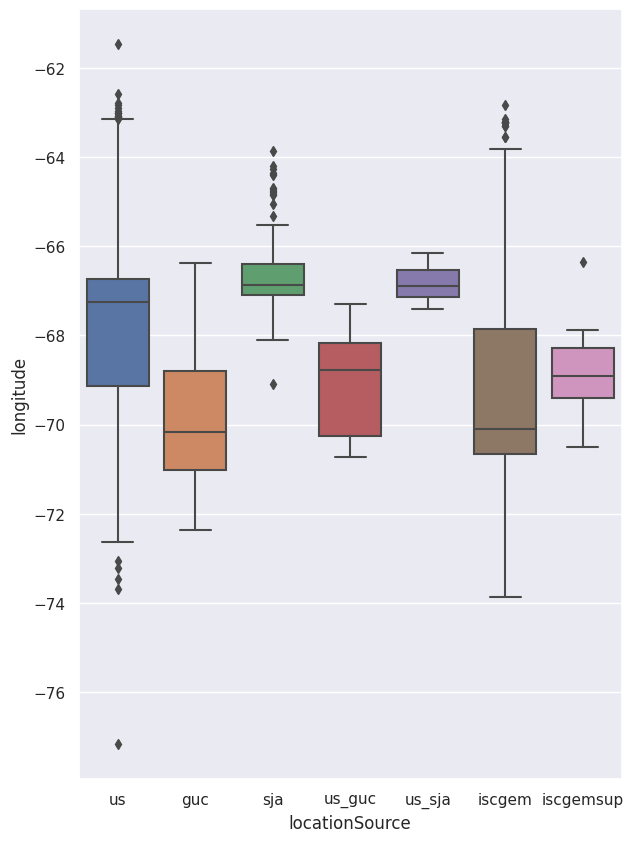

In [ ]:
sns.boxplot(x = 'locationSource',
            y = 'longitude',
            data = earthquake)
plt.show()

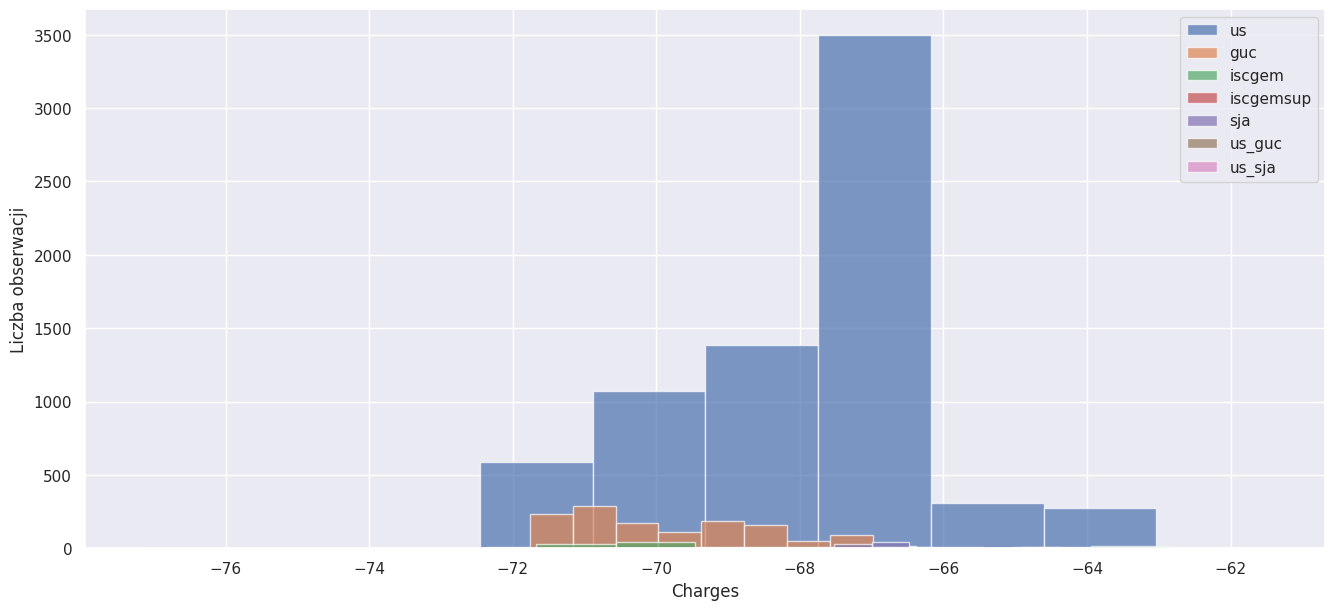

In [ ]:
fig, ax = plt.subplots(figsize=(16,7))
alfa = 0.7
ax.hist(earthquake.loc[earthquake['locationSource']=='us', 'longitude'], bins=10, alpha=alfa, label = 'us')
ax.hist(earthquake.loc[earthquake['locationSource']=='guc', 'longitude'], bins=10, alpha=alfa, label = 'guc')
ax.hist(earthquake.loc[earthquake['locationSource']=='iscgem', 'longitude'], bins=10, alpha=alfa, label = 'iscgem')
ax.hist(earthquake.loc[earthquake['locationSource']=='iscgemsup', 'longitude'], bins=10, alpha=alfa, label = 'iscgemsup')
ax.hist(earthquake.loc[earthquake['locationSource']=='sja', 'longitude'], bins=10, alpha=alfa, label = 'sja')
ax.hist(earthquake.loc[earthquake['locationSource']=='us_guc', 'longitude'], bins=10, alpha=alfa, label = 'us_guc')
ax.hist(earthquake.loc[earthquake['locationSource']=='us_sja', 'longitude'], bins=10, alpha=alfa, label = 'us_sja')


ax.set_xlabel('Charges')
ax.set_ylabel('Liczba obserwacji')
ax.legend()

plt.show()

Sieci badawcze us i iscgem mają bardzo szeroki zakres pomiarów. Pozostałe 5 sieci ma bardziej ograniczony zakres i skupia się na konkretnych długościach geograficznych. Z histogramu można odczytać, że znaczną przewagę stanowią dane z sieci us.

#Normalność, korelacja i budowa modelu#

##Normalność##

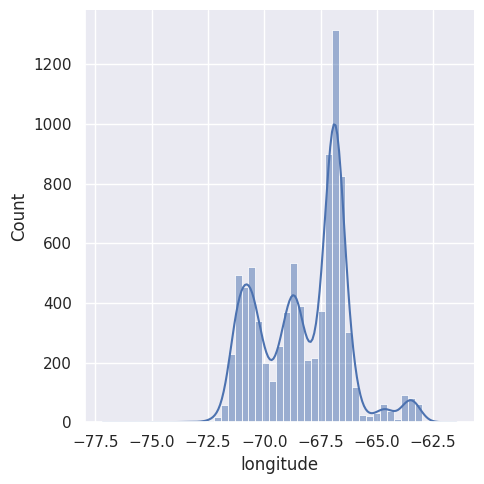

In [ ]:
sns.displot(earthquake['longitude'], kde=True)

Wykres cechuje potrójny rozkład normalny.

##Korelacja##

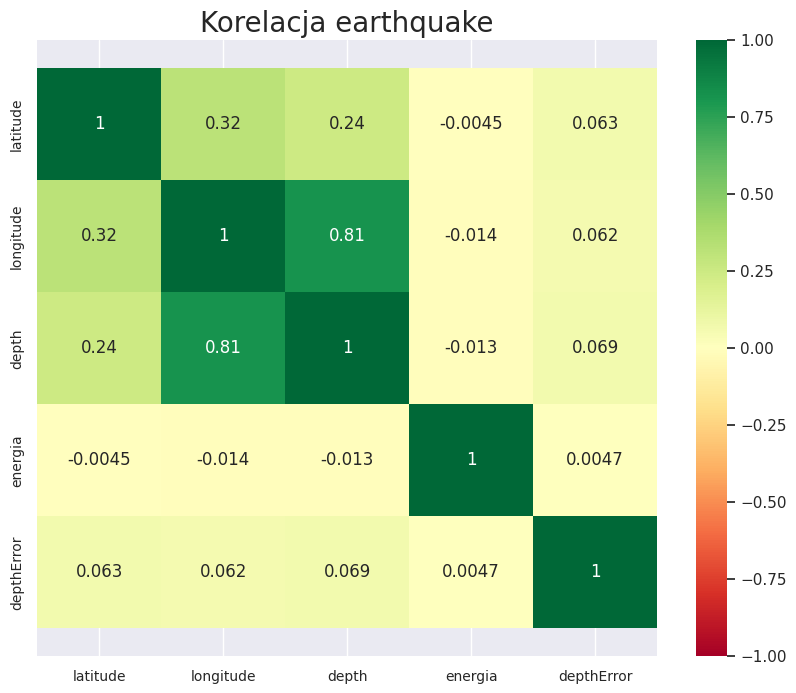

In [ ]:
plt.figure(figsize=(10, 8))

# wizualizacja Heatmapy korelacji
ax = sns.heatmap(earthquake[['latitude','longitude', 'depth', 'energia', 'depthError']].corr(),
                 xticklabels=earthquake[['latitude','longitude', 'depth', 'energia', 'depthError']].corr().columns,
                 yticklabels=earthquake[['latitude','longitude', 'depth', 'energia', 'depthError']].corr().columns, 
                 cmap='RdYlGn', 
                 vmin=-1, vmax=1,
                 annot=True, center=0)

# dekoracja wykresu
plt.title('Korelacja earthquake', fontsize=20)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.25, top - 0.25) # odsunięcie etykiet od wykresu

# Zmiana wymiaru etykiet
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

Widoczna jest bardzo wysoka korelacja pomiędzy depth a longitude. Pozwala to stworzyć model w dalszej części.

##Podział zbioru##

In [ ]:
X = earthquake[['latitude','longitude']]
y = earthquake[['depth']]

In [ ]:
X.shape

(8703, 2)

In [ ]:

y.shape

(8703, 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) 

In [ ]:
for subset in [X, y, X_train, y_train, X_test, y_test]:
    print(subset.shape)

(8703, 2)
(8703, 1)
(6092, 2)
(6092, 1)
(2611, 2)
(2611, 1)


##Tworzenie modelu##

In [ ]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

Współczynniki:

In [ ]:
model.coef_

array([[-0.89792126, 43.14852472]])

Wyraz wolny:

In [ ]:
model.intercept_

array([3059.93600005])

##Predykcja i sprawdzenie metryk##

In [ ]:
y_predict_train = model.predict(X_train)
y_predict_test = model.predict(X_test)

In [ ]:
R2_train = r2_score(y_true = y_train, y_pred = y_predict_train)
R2_test = r2_score(y_true = y_test, y_pred = y_predict_test)

MAE_train = mean_absolute_error(y_true = y_train, y_pred = y_predict_train)
MAE_test = mean_absolute_error(y_true = y_test, y_pred = y_predict_test)

MSE_train = mean_squared_error(y_true = y_train, y_pred = y_predict_train)
MSE_test = mean_squared_error(y_true = y_test, y_pred = y_predict_test)

RMSE_train = mean_squared_error(y_true = y_train, y_pred = y_predict_train, squared = False)
RMSE_test = mean_squared_error(y_true = y_test, y_pred = y_predict_test, squared = False)

print(f'''R2_train = {R2_train},     R2_test = {R2_test},
MAE_train = {MAE_train},    MAE_test = {MAE_test},
MSE_train = {MSE_train},    MSE_test = {MSE_test},
RMSE_train = {RMSE_train},    RMSE_test = {RMSE_test} ''')

R2_train = 0.6606575149486345,     R2_test = 0.6614460035825489,
MAE_train = 30.85186043060303,    MAE_test = 30.114852422385958,
MSE_train = 3521.513087112858,    MSE_test = 3413.2187350230147,
RMSE_train = 59.34233806577609,    RMSE_test = 58.42275870774175 


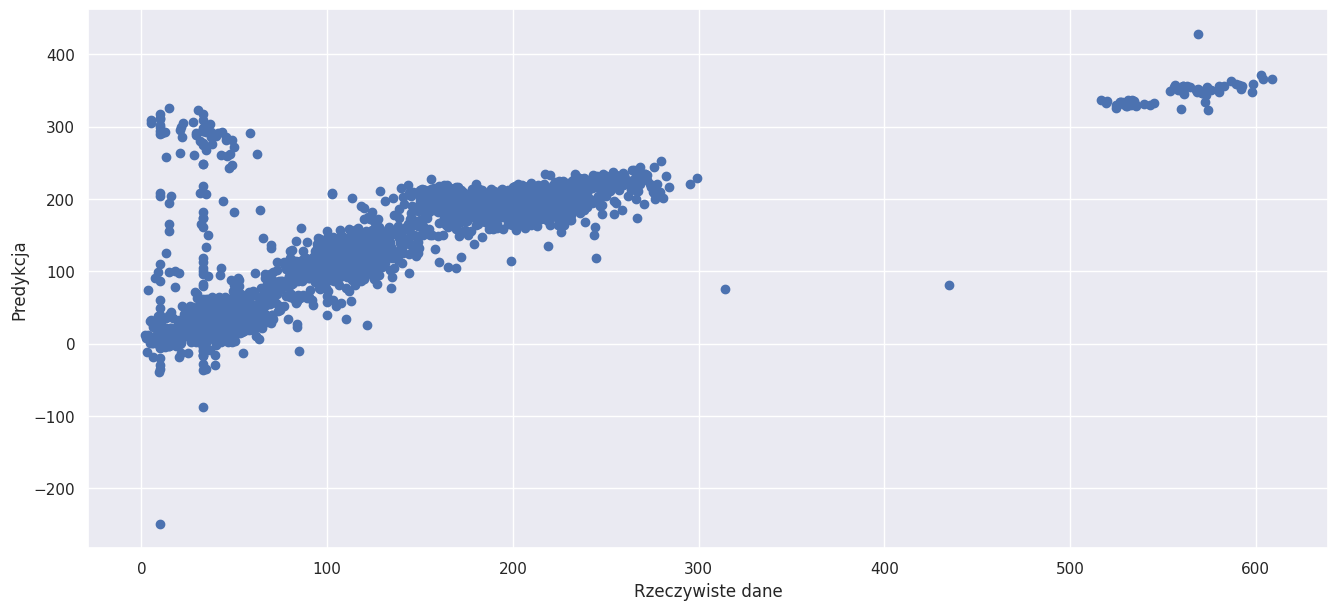

In [ ]:
fig, ax = plt.subplots(figsize=(16,7))

ax.scatter(x=y_test,
           y=y_predict_test)

ax.set_xlabel('Rzeczywiste dane')
ax.set_ylabel('Predykcja')

plt.show()

Wysoki poziom metryki R2 i niski poziom pozostałych metryk wskazjuje na dobrą jakość modelu, co potwierdza wykres predykcji.

Wykres zależności głębokości od długosci geograficznej

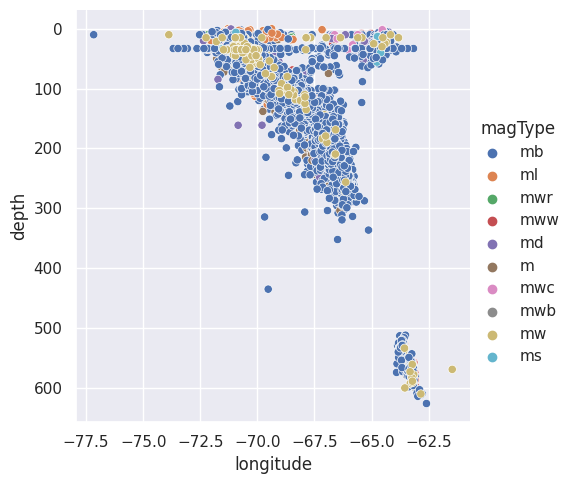

In [ ]:
sns.set(rc={'figure.figsize':(20,20)})
g = sns.relplot(earthquake, x="longitude", y="depth", hue="magType")
for ax in g.axes[0]:
    ax.invert_yaxis()

Grupa danych na wykresie predykcji, która znacznie odstaje w górę na początku wykresu, jest prawdopodobnie związana z występowaniem danych na wykresie zależności, które cechuje niska głębokość trzęsienia ziemi na prawie całym obszarze występowania zarejestrowanych zjawisk. Jest to prawdopodobnie spowodowane innym typem zjawiska powodującego trzęsienie ziemi: wymieniona wyżej grupa odstająca od wykresu predykcji to zbiór zjawisk spowodowanych ściskaniem i wypiętrzaniem skorupy kontynentalnej, natomiast pozostała większa część zjawisk jest związana z tarciem pomiędzy płytami.


#Wnioski#



*   Hipoteza o zależności pomiędzy głębokością trzęsienia ziemi, a odległością od początku strefy subdukcji została potwierdzona.
*   Udało się stworzyć dobry model przewidujący głębokość na podstawie długości geograficznej.
*   Przy tworzeniu modelu zauważyliśmy podwójną tendencje. Jedna grupa danych to trzęsienia ziemi na płytkiej głębokości na całym zakresie długości geograficznej grupy drugiej. Natomiast druga grupa to zjawiska, gdzie głębokość trzęsienia ziemi jest zależna od odległości. Pomimo tych rozbierzności model wyszedł poprawnie, a powyższa rozbierzność jest prawdopodobnie spowodowana dwoma różnymi typami trzęsień ziemi: dla grupy pierwszej - zgniatanie i wypiętrzanie skorupy kontynentalnej oraz zjawiska wulkaniczne, dla grupy drugiej - wzajemne tarcie dwóch płyt.


